Aluno: Jean Antonio Ribeiro<br>
RA: 265739



In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy.random import rand

def fill_dummy_values(df, scaling_factor):
  # Create copy of dataframe 
  df_dummy = df.copy(deep=True)
  
  # Iterate over each column
  for col in df_dummy:
    # Get column, column missing values and range   
    col = df_dummy[col]   
    col_null = col.isnull()       
    num_nulls = col_null.sum()   
    col_range = col.max() - col.min()
    
    # Shift and scale dummy values   
    dummy_values = (rand(num_nulls) - 2)    
    dummy_values = dummy_values * scaling_factor * col_range + col.min()
    
    # Return dummy values   
    col[col_null] = dummy_values

  return df_dummy

In [ ]:
# database com valores originais
df_heart = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/raw/heart.csv")

# databases com valores nulos
df_age   = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-age.csv")
df_chol  = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-chol.csv")
df_sex   = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-sex.csv")

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_age.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_chol.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,NaN,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_sex.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1


In [412]:
print('Média age: ', df_age['age'].isnull().sum())
print('Quantidade age: ', df_age['age'].isnull().count())

print('Média chol: ',df_chol['chol'].isnull().sum())
print('Quantidade chol: ', df_chol['chol'].isnull().count())

print('Média sex: ', df_sex['sex'].isnull().sum())
print('Quantidade sex: ',df_sex['sex'].isnull().count())

Média age:  36
Quantidade age:  303
Média chol:  113
Quantidade chol:  303
Média sex:  38
Quantidade sex:  303


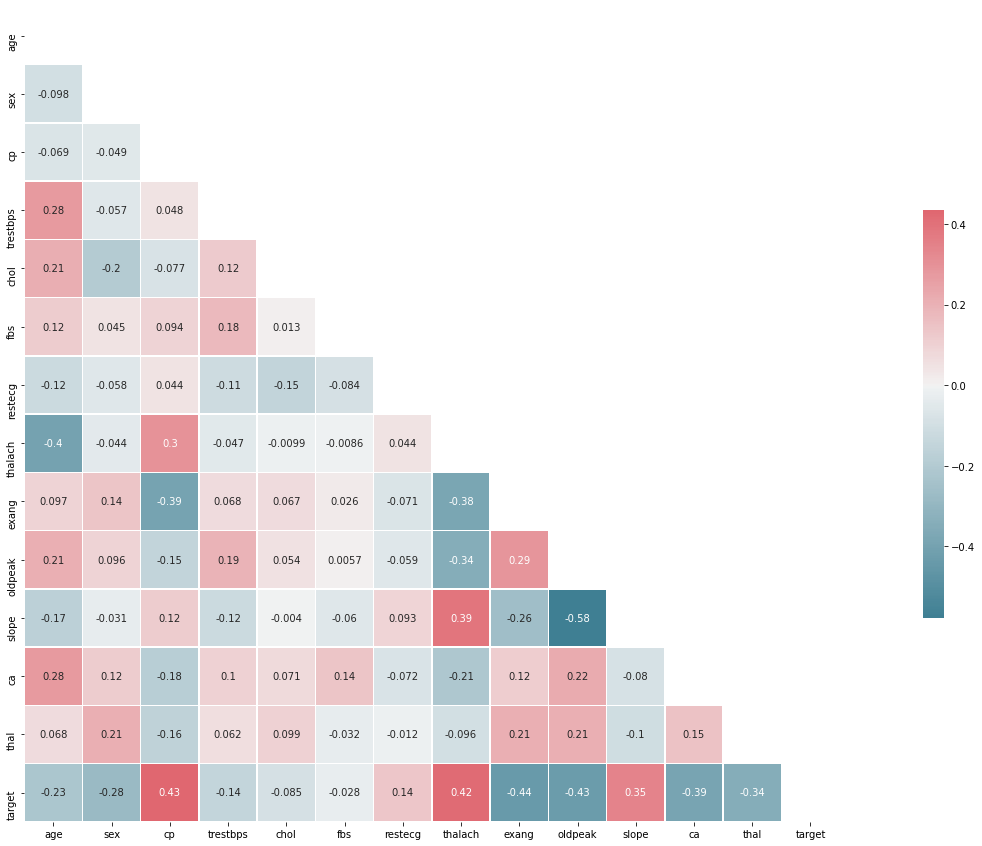

In [ ]:
import seaborn as sns

corr = df_heart.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5});

# age

Classificação: MNAR, pois os dados faltantes podem ter sidos não informados ou importados de forma errada para a tabela, ocazionando falta de dados na tabela, por exemplo.

Descrição da solução proposta para reposição dos dados faltantes: pode-se remover as tuplas com dados faltantes. Outra opção é aplicar uma normalização dos dados e, em seguida, utilizar a média entre dois ou mais pontos.

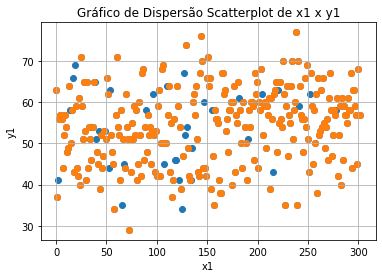

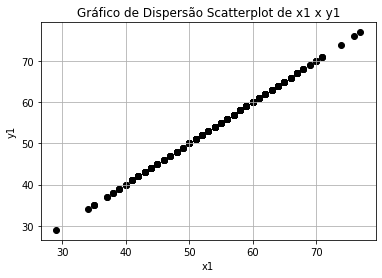

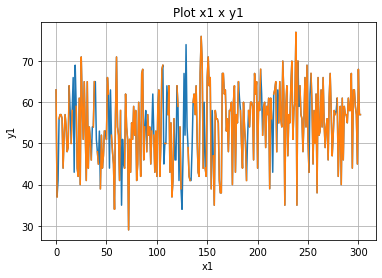

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['age'])),df_heart['age'])
plt.scatter(range(0,len(df_age['age'])),df_age['age'])
plt.grid()
plt.show()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(df_heart['age'], df_age['age'], c='k')
plt.grid()
plt.show()

plt.figure()
plt.title('Plot x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.plot(df_heart['age'], label='heart')
plt.plot(df_age['age'], label='age')
plt.grid()
plt.show()

In [ ]:
df_age['age'].head(20)

0     63.0
1     37.0
2      NaN
3     56.0
4     57.0
5     57.0
6     56.0
7     44.0
8     52.0
9     57.0
10    54.0
11    48.0
12    49.0
13    64.0
14     NaN
15    50.0
16    58.0
17     NaN
18    43.0
19     NaN
Name: age, dtype: float64

In [ ]:
filtro_age  = df_age['age'] > 0
aplica_age = df_age[filtro_age]
aplica_age.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57.0,1,0,140,192,0,1,148,0,0.4,1,0,1,1


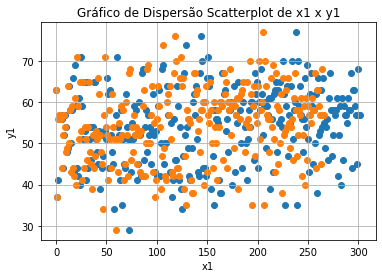

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['age'])),df_heart['age'])
plt.scatter(range(0,len(aplica_age['age'])),aplica_age['age'])
plt.grid()
plt.show()

## Remove elementos nulos

Média de elementos nulos na coluna age:  36
Quantidade de elementos nulos na coluna age:  age         267
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64


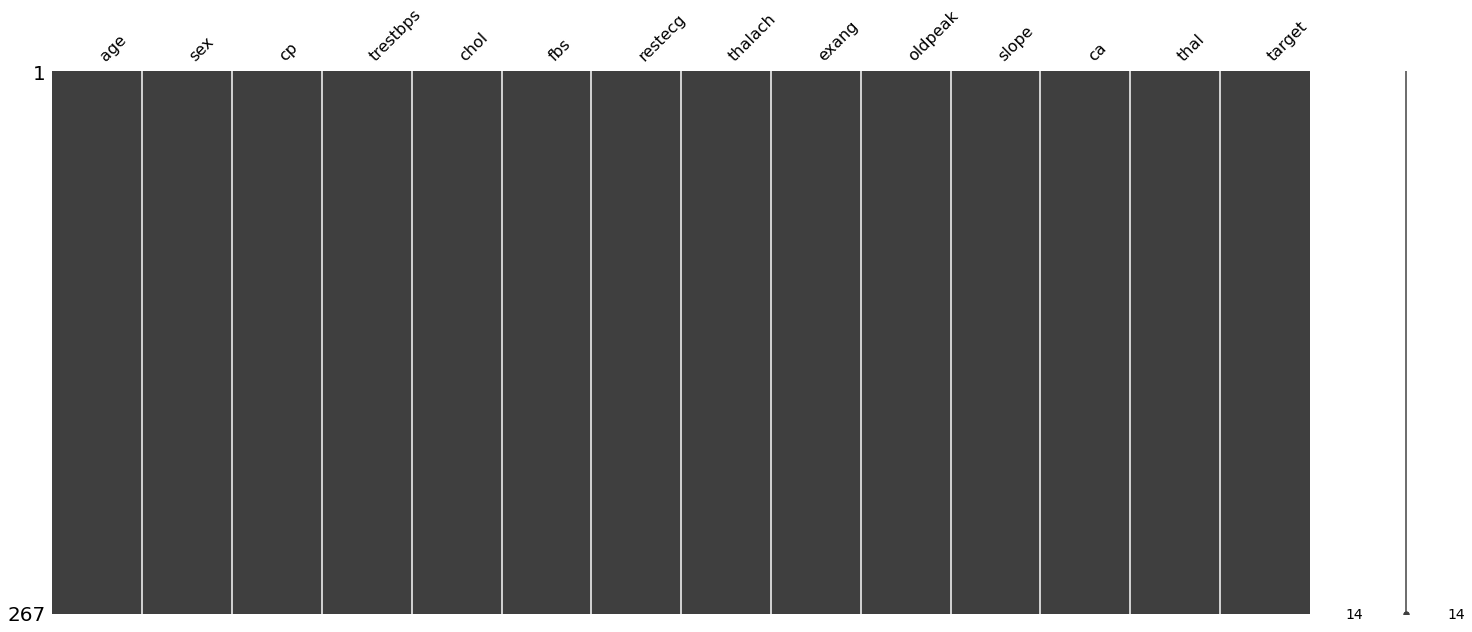

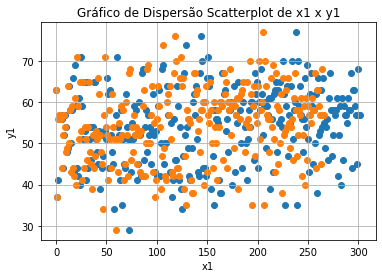

In [ ]:
print('Média de elementos nulos na coluna age: ', df_age['age'].isnull().sum())
print('Quantidade de elementos nulos na coluna age: ', df_age.count())

age = df_age.copy()
age.dropna(subset=["age"], how='any', inplace=True)
msno.matrix(age)
#age.head()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['age'])),df_heart['age'])
plt.scatter(range(0,len(age['age'])),age['age'])
plt.grid()
plt.show()

## Preenche as colunas com valores fictícios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


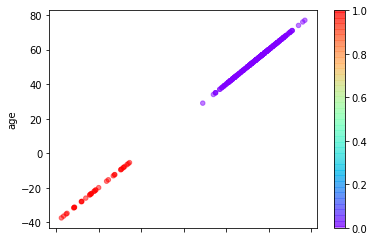

In [ ]:
# Create dummy data frame
diabetes_dummy = fill_dummy_values(df_age, 0.7)

# Get missing values of both columns for coloring
nullity=df_heart['age'].isnull()|df_age['age'].isnull()

# Generate scatter plot
diabetes_dummy.plot(x='age', y='age', kind='scatter', alpha=0.5, c=nullity, cmap='rainbow')

# chol

Classificação: MNAR, pois os dados faltantes podem ter ocorridos por causa do aparelho que mede o colesterol ter falhado, por exemplo.

Descrição da solução proposta para reposição dos dados faltantes: pode-se utilizar a remoçãão de dados faltantes ou aplicar um tipo de regressão, tal como lenar ou estrocática.

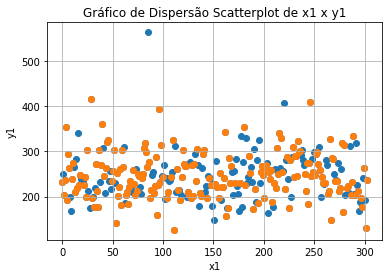

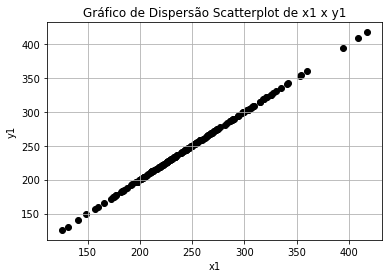

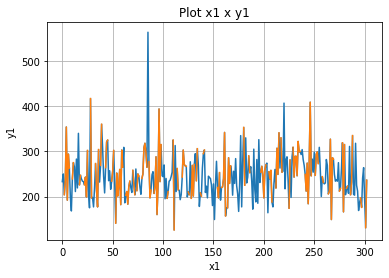

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['chol'])),df_heart['chol'])
plt.scatter(range(0,len(df_chol['chol'])),df_chol['chol'])
plt.grid()
plt.show()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(df_heart['chol'], df_chol['chol'], c='k')
plt.grid()
plt.show()

plt.figure()
plt.title('Plot x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
#plt.scatter(range(0,len(df_heart['chol'])),df_chol['chol'])
plt.plot(df_heart['chol'], label='heart')
plt.plot(df_chol['chol'], label='chol')
plt.grid()
plt.show()

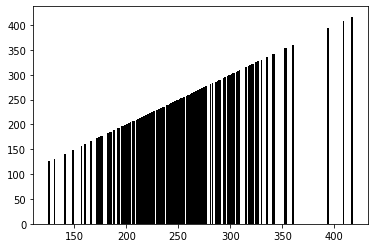

In [ ]:
width_n = 1.75   # Largura das Colunas 
bar_color = 'k'  # Côr da barra = Preto

plt.bar(df_chol['chol'], df_heart['chol'], width=width_n, color=bar_color)
plt.show()

In [ ]:
df_chol['chol'].head(20)

0     233.0
1       NaN
2     204.0
3     236.0
4     354.0
5     192.0
6     294.0
7     263.0
8       NaN
9       NaN
10    239.0
11    275.0
12      NaN
13    211.0
14      NaN
15    219.0
16      NaN
17    226.0
18    247.0
19      NaN
Name: chol, dtype: float64

In [ ]:
filtro_chol  = df_chol['chol'] > 0
aplica_chol = df_chol[filtro_chol]
aplica_chol.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150,0,2.3,0,0,1,1
2,41,0,1,130,204.0,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192.0,0,1,148,0,0.4,1,0,1,1


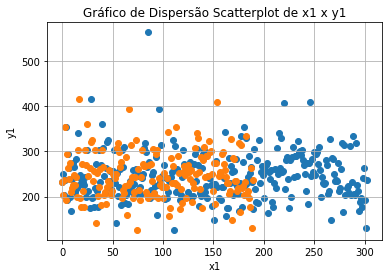

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['chol'])),df_heart['chol'])
plt.scatter(range(0,len(aplica_chol['chol'])),aplica_chol['chol'])
plt.grid()
plt.show()

## Remove elementos nulos

Média de elementos nulos na coluna chol:  113
Quantidade de elementos nulos na coluna chol:  age         303
sex         303
cp          303
trestbps    303
chol        190
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64


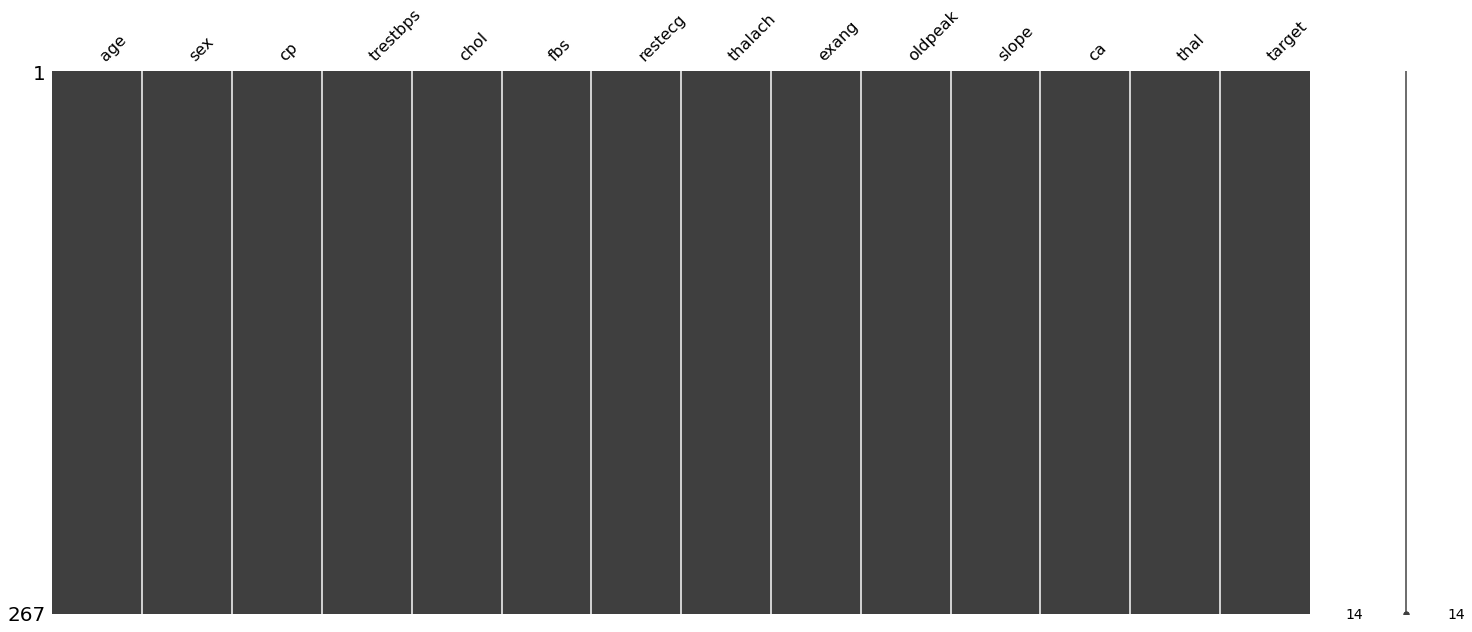

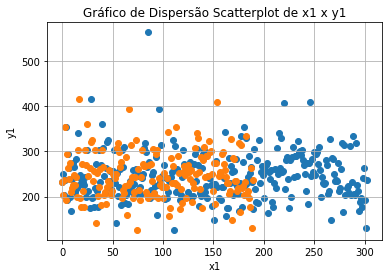

In [ ]:
print('Média de elementos nulos na coluna chol: ', df_chol['chol'].isnull().sum())
print('Quantidade de elementos nulos na coluna chol: ', df_chol.count())

chol = df_chol.copy()
chol.dropna(subset=["chol"], how='any', inplace=True)
msno.matrix(age)
chol.head()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['chol'])),df_heart['chol'])
plt.scatter(range(0,len(chol['chol'])),chol['chol'])
plt.grid()
plt.show()

## Preenche as colunas com valores fictícios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


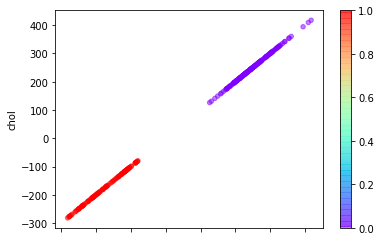

In [ ]:
# Create dummy data frame
diabetes_dummy = fill_dummy_values(df_chol, 0.7)

# Get missing values of both columns for coloring
nullity=df_heart['chol'].isnull()|df_chol['chol'].isnull()

# Generate scatter plot
diabetes_dummy.plot(x='chol', y='chol', kind='scatter', alpha=0.5, c=nullity, cmap='rainbow')

# sex

Classificação: MAR, pois os dados faltantes podem ter sido não informados porque as pessoas não queriam ser identificados no requisito sexo, por exemplo.

Descrição da solução proposta para reposição dos dados faltantes: pode-se utilizar a remoção dos dados faltantes ou aplicar uma méétrica que calcaula a distância entre dois pontos para preencher os dados faltantes.

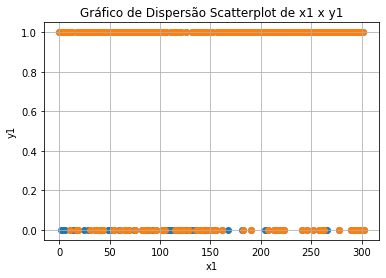

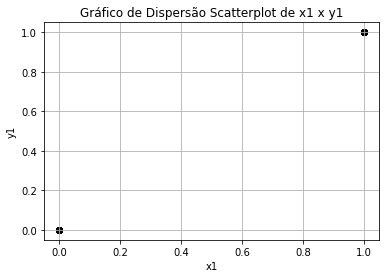

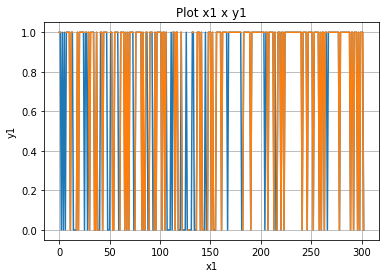

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['sex'])),df_heart['sex'])
plt.scatter(range(0,len(df_sex['sex'])),df_sex['sex'])
plt.grid()
plt.show()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(df_heart['sex'], df_sex['sex'], c='k')
plt.grid()
plt.show()

plt.figure()
plt.title('Plot x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.plot(df_heart['sex'], label='heart')
plt.plot(df_sex['sex'], label='sex')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.grid()
plt.show()

In [ ]:
df_sex['sex'].head(20)

0     1.0
1     1.0
2     NaN
3     1.0
4     NaN
5     1.0
6     NaN
7     1.0
8     1.0
9     1.0
10    1.0
11    0.0
12    1.0
13    1.0
14    NaN
15    NaN
16    NaN
17    0.0
18    1.0
19    0.0
Name: sex, dtype: float64

In [ ]:
filtro_sex  = df_sex['sex'] > 0
aplica_sex = df_sex[filtro_sex]
aplica_sex.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1.0,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1.0,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1.0,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1.0,1,120,263,0,1,173,0,0.0,2,0,3,1


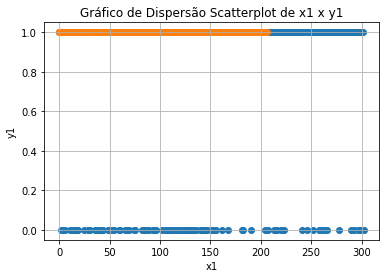

In [ ]:
plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['sex'])),df_heart['sex'])
plt.scatter(range(0,len(aplica_sex['sex'])),aplica_sex['sex'])
plt.grid()
plt.show()

## Remove elementos nulos

Média de elementos nulos na coluna sex:  38
Quantidade de elementos nulos na coluna sex:  age         303
sex         265
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64


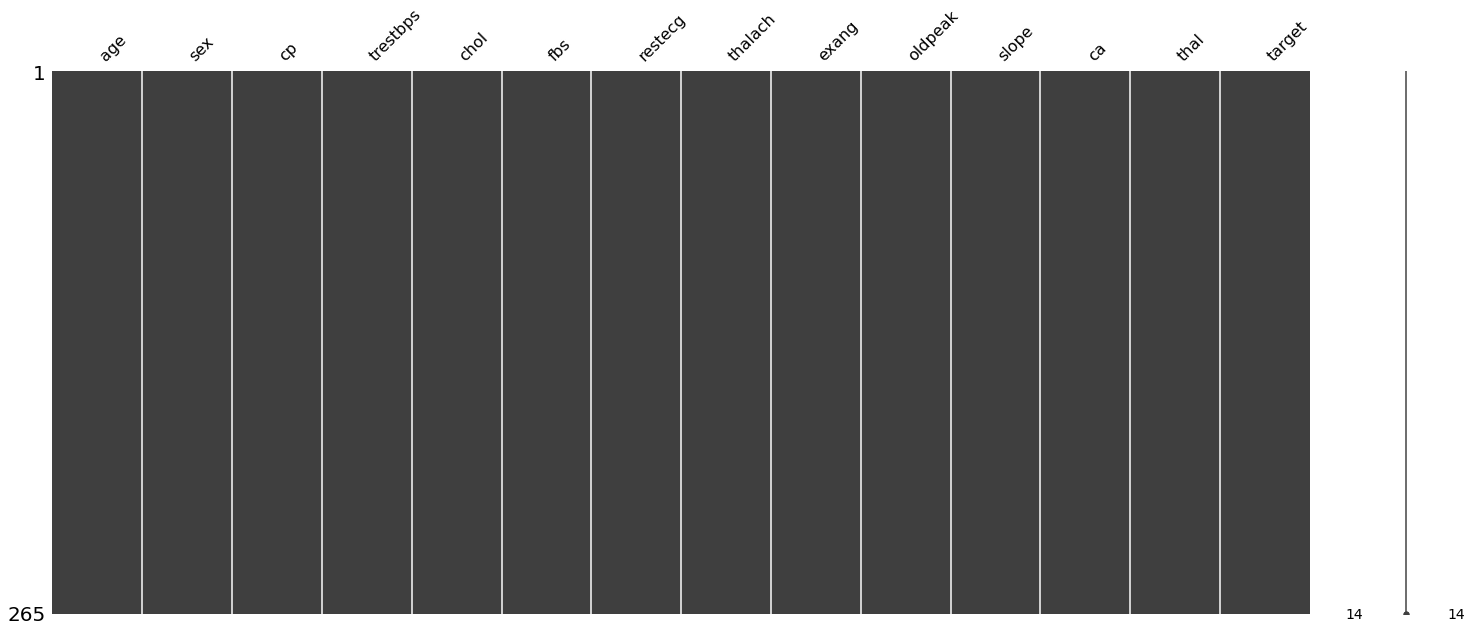

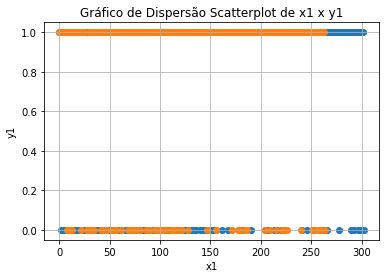

In [ ]:
print('Média de elementos nulos na coluna sex: ', df_sex['sex'].isnull().sum())
print('Quantidade de elementos nulos na coluna sex: ', df_sex.count())

sex = df_sex.copy()
sex.dropna(subset=["sex"], how='any', inplace=True)
msno.matrix(sex)
sex.head()

plt.figure()
plt.title('Gráfico de Dispersão Scatterplot de x1 x y1')
plt.xlabel('x1')
plt.ylabel('y1')
plt.scatter(range(0,len(df_heart['sex'])),df_heart['sex'])
plt.scatter(range(0,len(sex['sex'])),sex['sex'])
plt.grid()
plt.show()

## Preenche as colunas com valores fictícios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


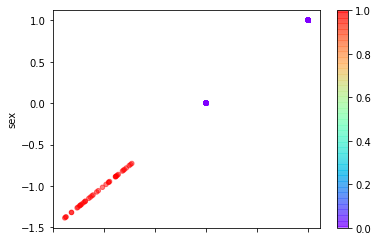

In [ ]:
# Create dummy data frame
diabetes_dummy = fill_dummy_values(df_sex, 0.7)

# Get missing values of both columns for coloring
nullity=df_heart['sex'].isnull()|df_sex['sex'].isnull()

# Generate scatter plot
diabetes_dummy.plot(x='sex', y='sex', kind='scatter', alpha=0.5, c=nullity, cmap='rainbow')

# Outros

In [ ]:
missing_values_count = df_age.isnull().sum()
total_cells = np.product(df_age.shape)
total_missing = missing_values_count.sum()
print((total_missing/total_cells) * 100)

0.8486562942008486


In [ ]:
df_age   = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-age.csv")
df = df_age.copy()
#remove todas as linhas com dados faltantes
df_linha=df.dropna()
#remove todas as colunas com dados faltantes
df_coluna=df.dropna(axis=1)
#df_linha.head()
#df_coluna.head()
#df.head()
#df_age.head()

In [ ]:
# preencher os valores ausentes. Para preencher todos NaN com zero:
df.fillna(0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,NaN,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


O método bfill preenche os valores ausentes com qualquer valor que venha diretamente após ele na mesma coluna. Um exemplo de uso pode ser na observação de temperatura ou dados pluviométricos.

In [ ]:
# Para um conjunto de dados que possuem uma ordem lógica pode ser feito dessa forma:
df.fillna(method = 'bfill', axis=0).fillna("0")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,56.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.query('age > 60').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
13,64.0,1,3,110,211,0,0,144,1,1.8,1,0,2,1
23,61.0,1,2,150,243,1,1,137,1,1.0,1,0,2,1
25,71.0,0,1,160,302,0,1,162,0,0.4,2,2,2,1
28,65.0,0,2,140,417,1,0,157,0,0.8,2,1,2,1


In [ ]:
df.query('age > 20 & sex==1').head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57.0,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44.0,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52.0,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57.0,1,2,150,168,0,1,174,0,1.6,2,0,2,1
10,54.0,1,0,140,239,0,1,160,0,1.2,2,0,2,1
12,49.0,1,1,130,266,0,1,171,0,0.6,2,0,2,1
13,64.0,1,3,110,211,0,0,144,1,1.8,1,0,2,1


In [ ]:
df.groupby(by='sex').size()

sex
0     96
1    207
dtype: int64

In [ ]:
df.groupby(['sex']).agg({'age': np.mean})

,age
sex,
0,56.866667
1,53.758454


In [ ]:
df.isnull().sum()

age         36
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

Preencher os valores faltantes da coluna 'agea com a moda (valor que mais se repete em cada uma dessas colunas). 

In [ ]:
values = {'age': df.age.mode()[0]}
# Atribuido os novos valores
df.fillna(value=values, inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,57.0,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

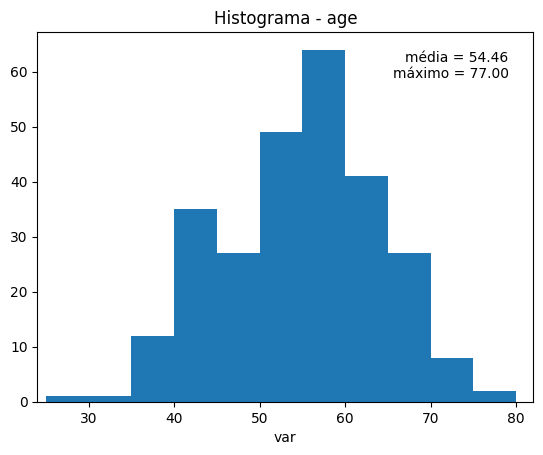

In [ ]:
#!/usr/bin/env python3.7.5
# -*- Coding: UTF-8 -*-
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Define functions
def histogram(type_hist, data, varname, place):
    """
    Plot histogram from given list values.
    Histogram types: fixed_bin_size or fixed_number_bins
    """
    title = 'Histograma - %s' %place
    figname = 'hist_%s.png' %place
    text = 'média = %.2f\nmáximo = %.2f' % (data.mean(), max(data))
    
    n_bins = 30
    bin_size = 5
    if type_hist == 'fixed_bin_size':
        bins = np.arange(0, 100, bin_size)
    elif type_hist == 'fixed_number_bins':
        bins = np.linspace(math.ceil(min(data)), math.floor(max(data)), n_bins)
    plt.xlim([min(data)-5, max(data)+5])
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(varname)
    #plt.ylabel('contagens')
    ax = plt.gca() # Get axis handle for text positioning
    plt.text(0.95, 0.95, text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
    plt.savefig(figname)    
    plt.show()
    #plt.close()

# Import CSV file into pandas dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-age.csv')
# Call histogram function
histogram('fixed_bin_size', df['age'], 'var', 'age')
#histogram('fixed_number_bins', df['age'], 'var', 'lugar')

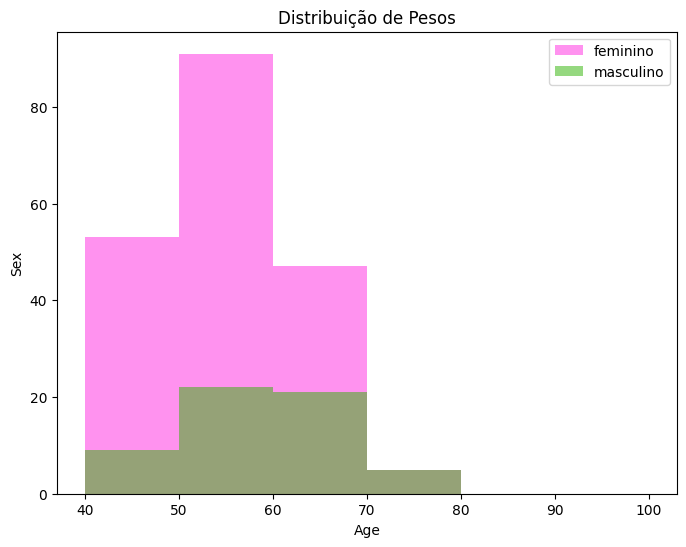

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-age.csv')

"""
Criando um histograma comparando os pesos masculino x feminino
"""
fem = df[df.sex == 1]
mas = df[df.sex == 0]
peso_fem = fem['age']
peso_mas = mas['age']

plt.figure(figsize=(8, 6))
plt.title('Distribuição de Pesos')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.hist(peso_fem, bins=range(40, 110,10), alpha=0.5, label='feminino', color='#FF26E1')
plt.hist(peso_mas, bins=range(40, 110,10), alpha=0.5, label='masculino', color='#2DB200')
plt.legend(loc='upper right')
#plt.savefig('imagens/peso-histograma-mas-x-fem.png')
#plt.close()
plt.show()

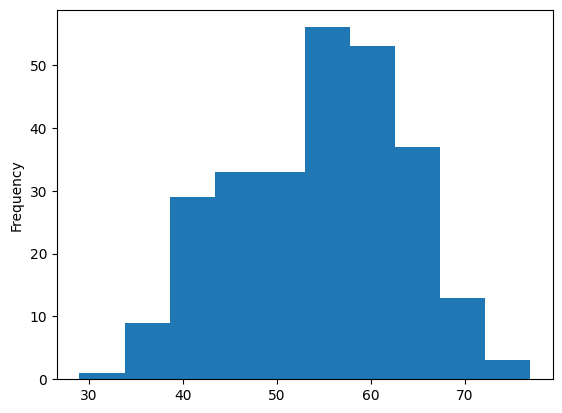

In [ ]:
df['age'].plot(kind='hist')

Preencher a coluna "Age" com a média das idades

In [391]:
filled_df = df_age
filled_df['age'].fillna(filled_df['age'].mean(), inplace=True)
filled_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.000000,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37.000000,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,54.456929,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.000000,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57.000000,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Ordenando o dafaset pelos valrores das idades

In [400]:
filled_df.sort_values(by='age').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29.0,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34.0,1,3,118,182,0,0,174,0,0.0,2,0,2,1
227,35.0,1,0,120,198,0,1,130,1,1.6,1,0,3,0
157,35.0,1,1,122,192,0,1,174,0,0.0,2,0,2,1
239,35.0,1,0,126,282,0,0,156,1,0.0,2,0,3,0


In [409]:
import pandas as pd
import numpy as np

df   = pd.read_csv("/content/drive/My Drive/Colab Notebooks/home-master/data/heart/processed/heart-missing-age.csv")

#Filtering rows with null values
df_null = df[df.isnull().values.any(axis=1)]

print(df_null)


     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
2    NaN    0   1       130   204    0  ...      0      1.4      2   0     2       1
14   NaN    0   3       150   283    1  ...      0      1.0      2   0     2       1
17   NaN    0   3       150   226    0  ...      0      2.6      0   0     2       1
19   NaN    0   3       140   239    0  ...      0      1.8      2   2     2       1
36   NaN    0   2       135   304    1  ...      0      0.0      2   0     2       1
39   NaN    0   2       160   360    0  ...      0      0.8      2   0     2       1
40   NaN    0   2       140   308    0  ...      0      1.5      2   1     2       1
43   NaN    0   0       130   264    0  ...      0      0.4      1   0     2       1
49   NaN    0   0       138   234    0  ...      0      0.0      2   0     2       1
53   NaN    0   2       108   141    0  ...      0      0.6      1   0     2       1
54   NaN    0   2       135   252    0  ...      0      0.0      